# 将C代码编译成动态链接库并使用cffi载入

`gccffi`模块提供的`%%cffi`魔法命令，可以把C语言代码自动编译曾动态链接库，并使用`cffi`载入。

In [1]:
%load_ext gccffi

下面使用`%%cffi`编译计算曼德博集合的函数`mandelbrot()`，并将编译结果命名为`c`。

In [43]:
%%cffi
#include <math.h>

double log2(double n)  
{  
    return log(n) / log(2);  
}  

void mandelbrot(double x1, double y1, double x2, double y2, double * arr, int maxx, int maxy, int max_iter)
{
    int xx, yy, counter;
    double dx, dy, x, y, a, b, tx, d;
    double *p;
    p = arr;
    dx = (x2 - x1) / maxx;
    dy = (y2 - y1) / maxy;
    p = arr;
    y = y1;
    for (yy = 0; yy < maxy; yy++) {
        x = x1;
        for (xx = 0; xx < maxx; xx++) {
            counter = 0;
            a = b = 0.0;
            do {
                tx = a*a - b*b + x;
                b = 2*b*a + y;
                a = tx;
                d = a*a + b*b;
                counter++;
            } while (d <= 100.0 && counter < max_iter);
            *p = counter;
            if(d > 4.0){
                *p -= log2(0.5 * log2(d));
            }
            *p++;
            x += dx;
        }
        y += dy;
    }
}

`c`是将`ffi`对象和`lib`对象的属性平坦化之后的对象。通过它可以通过访问`ffi`和`lib`的对象。

In [48]:
c

FlattenAttr[('ffi', <cffi.api.FFI object at 0x000001AB84EAC588>), ('lib', <cffi.api._make_ffi_library.<locals>.FFILibrary object at 0x000001AB84E7A390>)]

例如编译后的函数可以通过`c.lib.mandelbrot`或`c.mandelbrot`访问，而强制类型转换的函数可以通过`c.ffi.cast`或者`c.cast`访问。

In [44]:
c.mandelbrot

<cdata 'void(*)(double, double, double, double, double *, int, int, int)' 0x00000000646C14AB>

下面调用`mandelbrot()`函数，并将结果着色之后转换为图像。

In [45]:
import numpy as np
from matplotlib.cm import Blues
from PIL import Image

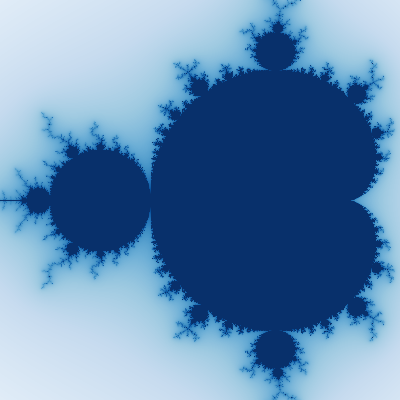

In [47]:
arr = np.zeros((400, 400), dtype=float)
c.mandelbrot(-1.5, -1, 0.5, 1, c.cast("double *", arr.ctypes.data), arr.shape[1], arr.shape[0], 100)
arr = np.log10(arr)
Image.fromarray((Blues(arr / arr.max()) * 255).astype(np.uint8))